In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
import os

In [2]:
df = pd.read_csv("video_games.csv")

# first glance at the dataset
df.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


In [3]:
# all the dataset columns 
df.columns

Index(['id', 'name', 'category', 'n_dlcs', 'n_expansions', 'year', 'follows',
       'in_franchise', 'genres', 'companies', 'platforms', 'user_score',
       'user_rating', 'n_user_reviews', 'summary'],
      dtype='object')

In [4]:
# ID, name , user_rating and summary are data that may not be soo useful to our studies, therefore we decided
# to remove them, as follows:
df = df.drop('id', axis = 'columns')
df = df.drop('name', axis = 'columns')
df = df.drop('user_score', axis = 'columns')
df = df.drop('summary', axis = 'columns')
df = df.drop('companies', axis = 'columns')

In [5]:
# we also removed null values, since there's not a significant amount of them 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5803 entries, 0 to 5823
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        5803 non-null   object
 1   n_dlcs          5803 non-null   int64 
 2   n_expansions    5803 non-null   int64 
 3   year            5803 non-null   int64 
 4   follows         5803 non-null   int64 
 5   in_franchise    5803 non-null   bool  
 6   genres          5803 non-null   object
 7   platforms       5803 non-null   object
 8   user_rating     5803 non-null   object
 9   n_user_reviews  5803 non-null   int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 459.0+ KB


In [6]:
#separation of genres and respective one-hot encoding
allGenres = []
allLines = []
for line in df['genres']:
    lineGenres = line.split(", ")
    allLines.append(lineGenres)
    for genre in lineGenres:
        if genre not in allGenres:
            allGenres.append(genre)

for genree in allGenres:
    current = []
    i = 0
    for linne in allLines:
        for a in linne:
            if a == genree:
                current.append(1)
                i = 1
                continue
        if i == 0:
            current.append(0)
        i = 0
    name_of_current = 'g_' + genree
    df[name_of_current] = current
    
df = df.drop('genres', axis = 'columns')    
df.head()

,category,n_dlcs,n_expansions,year,follows,in_franchise,platforms,user_rating,n_user_reviews,g_Shooter,...,g_Real Time Strategy (RTS),g_Fighting,g_Tactical,g_Sport,g_MOBA,g_Card & Board Game,g_Visual Novel,g_Music,g_Pinball,g_Quiz/Trivia
0,main_game,0,0,2013,1766,True,"PC (Microsoft Windows), PlayStation 3, Xbox 36...",great,3369,1,...,0,0,0,0,0,0,0,0,0,0
1,main_game,4,2,2015,1516,True,"PC (Microsoft Windows), PlayStation 4, Xbox On...",great,2997,0,...,0,0,0,0,0,0,0,0,0,0
2,main_game,3,0,2011,1046,False,"PC (Microsoft Windows), PlayStation 3, Xbox 360",great,2567,0,...,0,0,0,0,0,0,0,0,0,0
3,main_game,3,0,2011,963,True,"Linux, PC (Microsoft Windows), PlayStation 3, ...",great,2544,1,...,0,0,0,0,0,0,0,0,0,0
4,main_game,0,0,2007,894,True,"Linux, PC (Microsoft Windows), PlayStation 3, ...",great,2297,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# separation of platforms and respective one-hot encoding
allPlaforms = []
allLines = []
for line in df['platforms']:
    linePlaforms = line.split(", ")
    allLines.append(linePlaforms)
    for plat in linePlaforms:
        if plat not in allPlaforms:
            allPlaforms.append(plat)

for platt in allPlaforms:
    current = []
    i = 0
    for linne in allLines:
        for a in linne:
            if a == platt:
                current.append(1)
                i = 1
                continue
        if i == 0:
            current.append(0)
        i = 0
    name_of_current = 'p_' + platt
    df[name_of_current] = current
    
df = df.drop('platforms', axis = 'columns')    


/var/folders/wb/ygw7fxnn1b1drc5xsy0y5wch0000gn/T/ipykernel_1641/3931772699.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name_of_current] = current


<AxesSubplot:>

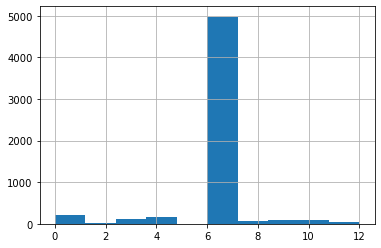

In [8]:
# transforming string columns into numerical information 
from sklearn import preprocessing
cat = preprocessing.LabelEncoder()

df['category'] = cat.fit_transform(df['category'])

# histogram for all the categories
df['category'].hist()

<AxesSubplot:>

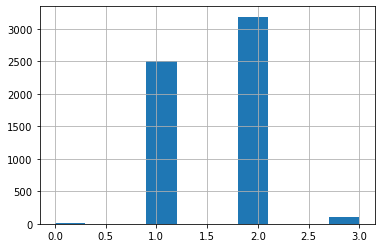

In [9]:
from sklearn import preprocessing
rat = preprocessing.LabelEncoder()

df['user_rating'] = rat.fit_transform(df['user_rating'])

# histogram for the user rating
df['user_rating'].hist()

In [10]:
list(rat.transform(['great', 'good', 'mediocre', 'bad'])) # 0 = bad, 1 = good, 2 = great, 3 = mediocre 

[2, 1, 3, 0]

In [11]:
# transforming True or False stings into 1 or 0 integers 
df['in_franchise'] = df['in_franchise'].astype(int)
df['in_franchise'].head() 

0    1
1    1
2    0
3    1
4    1
Name: in_franchise, dtype: int64

<AxesSubplot:>

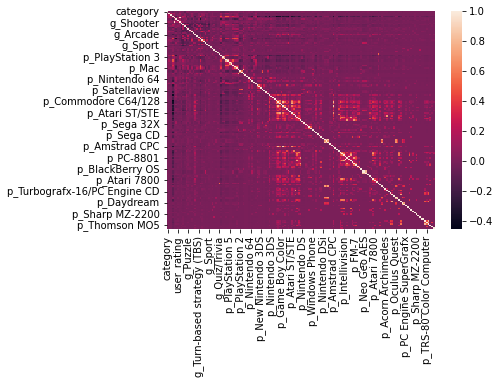

In [12]:
# we created a heatmap with all the columns from the clean data
heatMap = df.corr()
sb.heatmap(heatMap)

In [13]:
# checking what's the most significant column in the dataset compared to user_rating 
HM = heatMap['user_rating'].drop(['user_rating'])
max = HM.max()
HM[HM == max]

n_user_reviews    0.174868
Name: user_rating, dtype: float64

<AxesSubplot:>

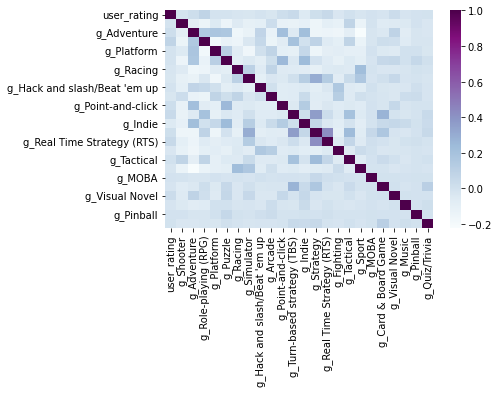

In [14]:
# heatmap relating all the geners and user_rating
genres = [col for col in df if col.startswith('g_')]
gen = df[['user_rating'] + genres]

G = gen.corr()
sb.heatmap(G,cmap = "BuPu")

In [15]:
# what is the most influencial gener?
GEN = G['user_rating'].drop(['user_rating'])
max = GEN.max()
GEN[GEN == max]

g_Role-playing (RPG)    0.082894
Name: user_rating, dtype: float64

<AxesSubplot:>

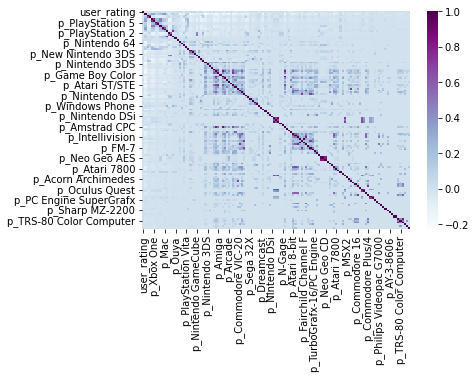

In [16]:
# heatmap relating all the platforms and user_rating
platforms = [col for col in df if col.startswith('p_')]
plat = df[['user_rating'] + platforms]

P = plat.corr()
sb.heatmap(P,cmap = "BuPu")

In [17]:
# what is the most influencial platform?
PLAT = P['user_rating'].drop(['user_rating'])
max = PLAT.max()
PLAT[PLAT == max]

p_New Nintendo 3DS    0.042153
Name: user_rating, dtype: float64

In [18]:
# dividing the data into a train and test dataframes so we can compare accuracies 
from sklearn.model_selection import train_test_split

dff = df.drop('user_rating', axis = 'columns')
x = dff
y = df[['user_rating']]

seed = 1111
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = seed, stratify = y)

In [19]:
# Dummy Classifier (Control)
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(xTrain, yTrain)

predict_test = dummy_clf.predict(xTest) 
predict_train = dummy_clf.predict(xTrain) 

print("Train Accuracy (D):")
acc_train = sum(predict_train == yTrain['user_rating'])/len(yTrain)
print(acc_train)


print("Test Accuracy (D):")
acc_test = sum(predict_test == yTest['user_rating'])/len(yTest)
print(acc_test)

Train Accuracy (D):
0.5489906450024619
Test Accuracy (D):
0.5485353245261344


[Text(0, 0.5, 'Bad'),
 Text(0, 1.5, 'Good'),
 Text(0, 2.5, 'Great'),
 Text(0, 3.5, 'Mediocre')]

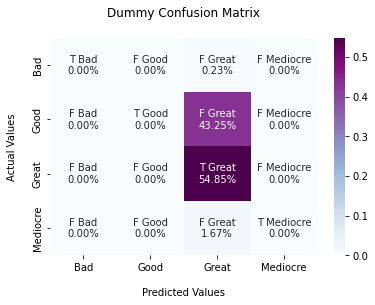

In [20]:
# Dummy's model confusion matrix 
from sklearn.metrics import confusion_matrix
y_true = yTest
y_pred = predict_test
cm_d = confusion_matrix(y_true, y_pred)

classifiers = ['T Bad','F Good','F Great','F Mediocre','F Bad','T Good','F Great','F Mediocre',
               'F Bad','F Good','T Great','F Mediocre','F Bad','F Good','F Great','T Mediocre']
percentages = ["{0:.2%}".format(value) for value in cm_d.flatten()/np.sum(cm_d)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(classifiers,percentages)]
labels = np.asarray(labels).reshape(4,4)

ax = sb.heatmap(cm_d/np.sum(cm_d), annot = labels, fmt = '', cmap = "BuPu")

ax.set_title('Dummy Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values\n')
ax.xaxis.set_ticklabels(['Bad','Good','Great','Mediocre'])
ax.yaxis.set_ticklabels(['Bad','Good','Great','Mediocre'])

Text(0.5, 1.0, 'Dummy Learning Curve \n')

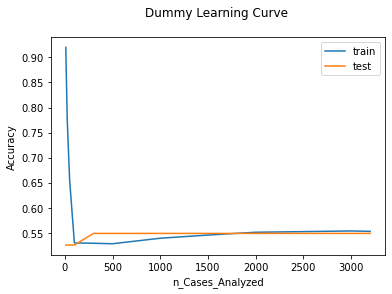

In [22]:
# Learning Curve of the model, how accuracy changes with the increment of the amount of data
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = dummy_clf, X = xTrain, random_state = seed, 
                   y = yTrain, train_sizes = [10, 25, 50, 100, 300,500,1000,1500,2000,3000,3200])

train_mean = train_scores.mean(axis = 1)
test_mean = test_scores.mean(axis = 1)

mpl.plot(train_sizes, train_mean, label = 'train')
mpl.plot(train_sizes, test_mean, label = 'test')

mpl.legend()
mpl.ylabel("Accuracy")
mpl.xlabel("n_Cases_Analyzed")
mpl.title("Dummy Learning Curve \n")

In [23]:
# we tested the Dummy algorithtm with different strategies
# in the best case scenario we achieved 0.5485353245261344 acc

strategies = ['most_frequent', 'prior', 'stratified', 'uniform']
accuracies = [0.5485353245261344, 0.5485353245261344, 0.48822515795519816, 0.24009190120620333]

In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

df1 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 25, random_state = seed)
df1.fit(xTrain, yTrain)

xPred = df1.predict(xTrain)     
trainAccuracy = sum(xPred == yTrain['user_rating'])/len(yTrain)

print("Train Accuracy (DT):")
print(trainAccuracy)    

xPred1 = df1.predict(xTest)      
testAccuracy = sum(xPred1 == yTest['user_rating'])/len(yTest)

print("Test Accuracy (DT):")
print(testAccuracy)  

Train Accuracy (DT):
0.673313638601674
Test Accuracy (DT):
0.6616886846639862


Text(0.5, 1.0, 'Decision Tree Learning Curve \n')

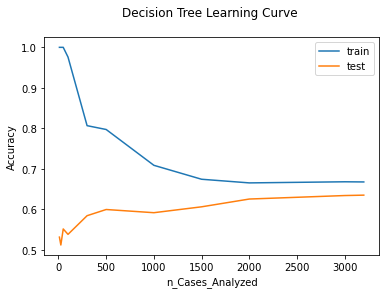

In [26]:
# Learning Curve of the model, how accuracy changes with the increment of the amount of data
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = df1, X = xTrain, random_state = seed, 
                   y = yTrain, train_sizes = [10, 25, 50, 100, 300,500,1000,1500,2000,3000,3200])

train_mean = train_scores.mean(axis = 1)
test_mean = test_scores.mean(axis = 1)

mpl.plot(train_sizes, train_mean, label = 'train')
mpl.plot(train_sizes, test_mean, label = 'test')

mpl.legend()
mpl.ylabel("Accuracy")
mpl.xlabel("n_Cases_Analyzed")
mpl.title("Decision Tree Learning Curve \n")

In [27]:
# we created a loop to check which is the best max_leaf_nodes to work with
maxAcc = 0
Acc = 0
i = 2
maxi = 2

while i <= 100:
    nodes = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = i, random_state = seed)
    nodes.fit(xTrain, yTrain)   
    
    x_nodes_Pred = nodes.predict(xTest)      
    testAccuracy = sum(x_nodes_Pred == yTest['user_rating'])/len(yTest)
    
    Acc = testAccuracy 
    if Acc > maxAcc:
        maxAcc = Acc
        maxi = i
    i += 1
    
print(maxAcc, maxi)
# therefore we'll be using 25 max_leaf_node

0.6616886846639862 25


[Text(0, 0.5, 'Bad'),
 Text(0, 1.5, 'Good'),
 Text(0, 2.5, 'Great'),
 Text(0, 3.5, 'Mediocre')]

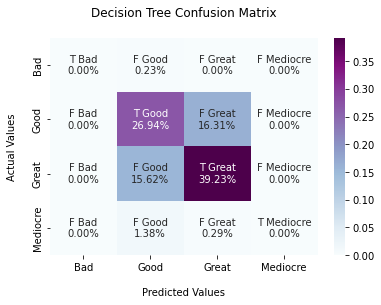

In [28]:
# DT's model confusion matrix 
y_true = yTest
y_pred = xPred1
cm_dt = confusion_matrix(y_true, y_pred)

classifiers = ['T Bad','F Good','F Great','F Mediocre','F Bad','T Good','F Great','F Mediocre',
               'F Bad','F Good','T Great','F Mediocre','F Bad','F Good','F Great','T Mediocre']
percentages = ["{0:.2%}".format(value) for value in cm_dt.flatten()/np.sum(cm_dt)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(classifiers,percentages)]
labels = np.asarray(labels).reshape(4,4)

ay = sb.heatmap(cm_dt/np.sum(cm_dt), annot = labels, fmt = '', cmap = "BuPu")

ay.set_title('Decision Tree Confusion Matrix\n')
ay.set_xlabel('\nPredicted Values')
ay.set_ylabel('Actual Values\n')
ay.xaxis.set_ticklabels(['Bad','Good','Great','Mediocre'])
ay.yaxis.set_ticklabels(['Bad','Good','Great','Mediocre'])

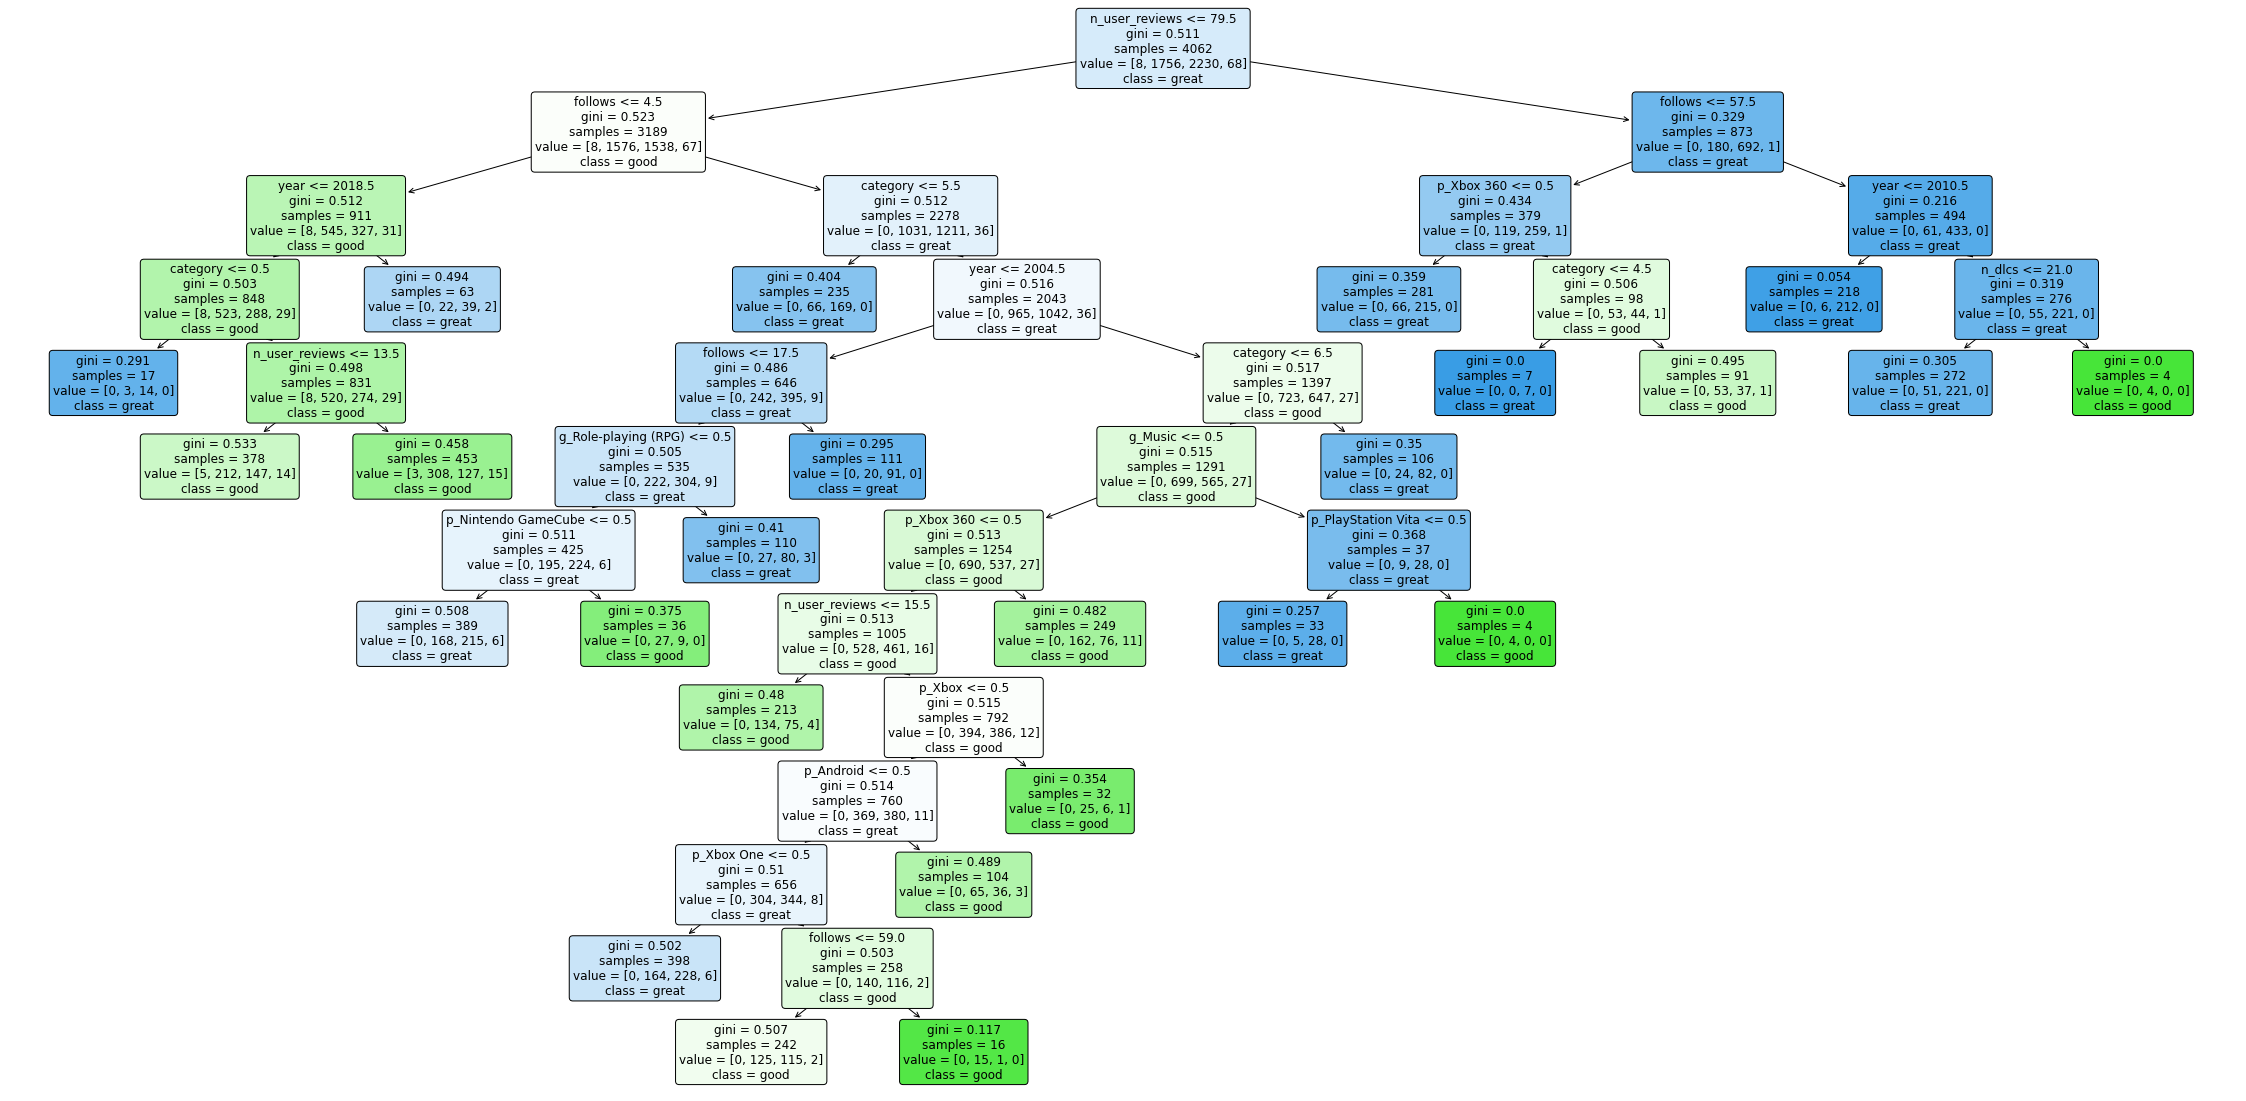

In [29]:
# plotting the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (40, 20))
columns_names = dff.columns

a = tree.plot_tree(df1, rounded = True, filled = True, fontsize = 12,feature_names = columns_names, 
                   class_names = ['bad', 'good', 'great', 'mediocre'])
plt.show()

In [30]:
# KNN Algorithm 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain.values.ravel())
 
# Calculate the accuracy of the model
print("Train Accuracy (KNN):")
print(knn.score(xTrain, yTrain))

print("Test Accuracy (KNN):")
print(knn.score(xTest, yTest))

Train Accuracy (KNN):
0.7434761201378631
Test Accuracy (KNN):
0.617461229178633


[Text(0, 0.5, 'Bad'),
 Text(0, 1.5, 'Good'),
 Text(0, 2.5, 'Great'),
 Text(0, 3.5, 'Mediocre')]

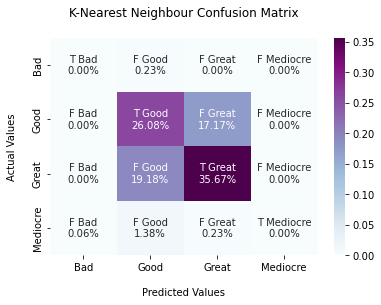

In [31]:
# KNN's model confusion matrix 
y_true = yTest
y_pred = knn.predict(xTest)
cm_knn = confusion_matrix(y_true, y_pred)

classifiers = ['T Bad','F Good','F Great','F Mediocre','F Bad','T Good','F Great','F Mediocre',
               'F Bad','F Good','T Great','F Mediocre','F Bad','F Good','F Great','T Mediocre']
percentages = ["{0:.2%}".format(value) for value in cm_knn.flatten()/np.sum(cm_knn)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(classifiers,percentages)]
labels = np.asarray(labels).reshape(4,4)

az = sb.heatmap(cm_knn/np.sum(cm_knn), annot = labels, fmt = '', cmap = "BuPu")

az.set_title('K-Nearest Neighbour Confusion Matrix\n')
az.set_xlabel('\nPredicted Values')
az.set_ylabel('Actual Values\n')
az.xaxis.set_ticklabels(['Bad','Good','Great','Mediocre'])
az.yaxis.set_ticklabels(['Bad','Good','Great','Mediocre'])

/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: 

/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/isabelantoniacostabrito/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: 

Text(0.5, 1.0, 'K-Nearest Neighbour Learning Curve \n')

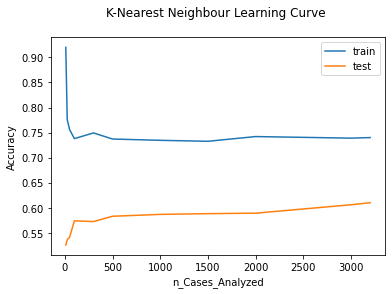

In [32]:
# Learning Curve of the model, how accuracy changes with the increment of the amount of data
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = knn, X = xTrain, random_state = seed, 
                   y = yTrain, train_sizes = [10, 25, 50, 100, 300,500,1000,1500,2000,3000,3200])

train_mean = train_scores.mean(axis = 1)
test_mean = test_scores.mean(axis = 1)

mpl.plot(train_sizes, train_mean, label = 'train')
mpl.plot(train_sizes, test_mean, label = 'test')

plt.legend()
mpl.ylabel("Accuracy")
mpl.xlabel("n_Cases_Analyzed")
mpl.title("K-Nearest Neighbour Learning Curve \n")

# unfortunately we ran into an error while loading this plot, although we still got a usable outcome 

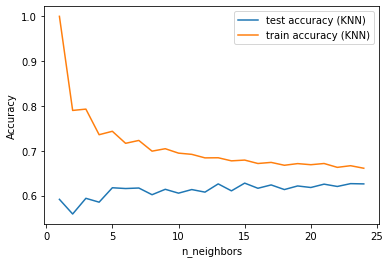

In [33]:
# accuracy variation based on K values
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# loop over K values
for i, k in enumerate(neighbors):
 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xTrain, yTrain.values.ravel())
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(xTrain, yTrain)
    test_accuracy[i] = knn.score(xTest, yTest)
 

# create the plot
plt.plot(neighbors, test_accuracy, label = 'test accuracy (KNN)')
plt.plot(neighbors, train_accuracy, label = 'train accuracy (KNN)')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# testing all the models above for different seeds
from sklearn.model_selection import train_test_split
seeds = [245, 4721, 2549, 8201, 13, 17, 9714, 841, 1111, 123, 3324, 2272, 1410, 69, 0, 33, 8888]

Test_D = []
Train_D = []
Test_DT = []
Train_DT = []
Test_KNN = []
Train_KNN = []

for seed in range(len(seeds)):
    dff = df.drop('user_rating', axis = 'columns')
    x = dff
    y = df[['user_rating']]

    seed = seeds[seed]
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = seed, stratify = y)

    
    # Dummy Classifier (Control)
    from sklearn.dummy import DummyClassifier

    dummy = DummyClassifier(strategy = 'most_frequent')
    dummy.fit(xTrain, yTrain)

    pred_test = dummy.predict(xTest) 
    pred_train = dummy.predict(xTrain) 

    acc_train = sum(pred_train == yTrain['user_rating'])/len(yTrain)
    Train_D.append(acc_train)
    
    acc_test = sum(pred_test == yTest['user_rating'])/len(yTest)
    Test_D.append(acc_test)
    
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier

    tree = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 25, random_state = seed)
    tree.fit(xTrain, yTrain)

    xPred = tree.predict(xTrain)     
    trainAccuracy = sum(xPred == yTrain['user_rating'])/len(yTrain)
    Train_DT.append(trainAccuracy) 

    xPred1 = tree.predict(xTest)      
    testAccuracy = sum(xPred1 == yTest['user_rating'])/len(yTest)
    Test_DT.append(testAccuracy) 

    
    # KNN Algorithm 
    from sklearn.neighbors import KNeighborsClassifier

    knn1 = KNeighborsClassifier(n_neighbors = 5)
    knn1.fit(xTrain, yTrain.values.ravel())
    
    train = knn1.score(xTrain, yTrain)
    Train_KNN.append(train)

    test = knn1.score(xTest, yTest)
    Test_KNN.append(test)


Acc = pd.DataFrame({'seed' : seeds, 'Train_Acc_D' :  Train_D, 'Test_Acc_D' : Test_D,
                    'Train_Acc_DT' :  Train_DT, 'Test_Acc_DT' : Test_DT,
                    'Train_Acc_KNN' :  Train_KNN, 'Test_Acc_KNN' : Test_KNN})

Acc

,seed,Train_Acc_D,Test_Acc_D,Train_Acc_DT,Test_Acc_DT,Train_Acc_KNN,Test_Acc_KNN
0,245,0.548991,0.548535,0.654357,0.628374,0.738060,0.619759
1,4721,0.548991,0.548535,0.666913,0.623205,0.740030,0.612866
2,2549,0.548991,0.548535,0.672329,0.647904,0.734613,0.628949
3,8201,0.548991,0.548535,0.672083,0.630672,0.735844,0.615738
4,13,0.548991,0.548535,0.669621,0.634693,0.739783,0.604250
5,17,0.548991,0.548535,0.659035,0.612866,0.747169,0.616312
6,9714,0.548991,0.548535,0.672083,0.637565,0.736583,0.620908
7,841,0.548991,0.548535,0.673314,0.622056,0.734121,0.623205
8,1111,0.548991,0.548535,0.673314,0.661689,0.743476,0.617461
9,123,0.548991,0.548535,0.654850,0.632395,0.743968,0.625503
